# Visualizations for Instacart

## Contains:
### Order hour of day histogram
### loyalty bar chart
### prices by hour of day line chart
### number dependants by age line plot
### income by age scatter

In [1]:
#import libraries including those meeded for visualizations 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#create file path
path = r'C:\Users\krist\08.2023_InstacartBasketAnalysis'

In [3]:
#import latest prepared dataset and check import
df_ords_prods_all = pd.read_pickle(os.path.join(path, 
                                                '02.Data', 
                                                'Prepared_Data', 
                                                'orders_products_all.pkl'))
df_ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Spending_flag,median_days_since_last_order,frequency_flag,Gender,State,Age,date_joined,num_dependants,fam_status,income
0,2539329,1,1,2,8,11.0,196,1,0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


## Create histogram for order hour of day

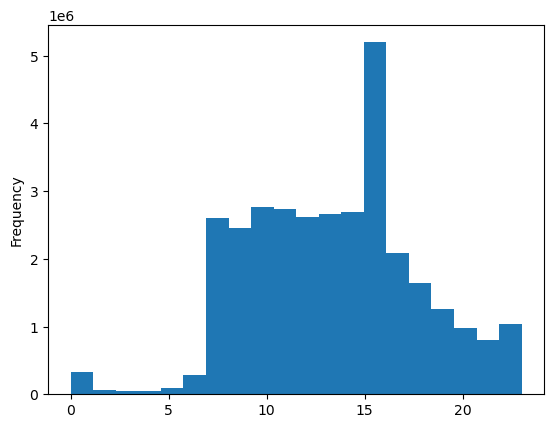

In [4]:
#create histogram
order_hr_hist = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 20)

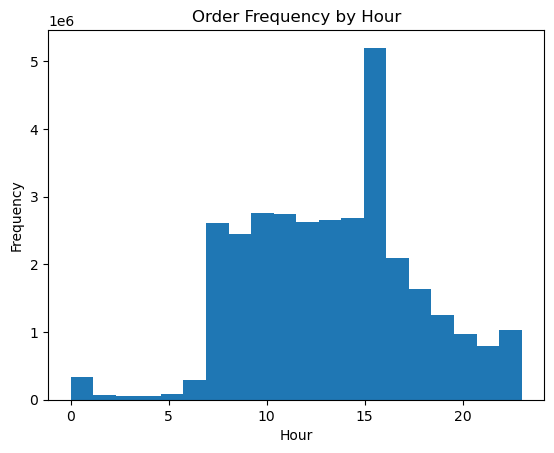

In [7]:
order_hr_hist.set_title('Order Frequency by Hour')
order_hr_hist.set_xlabel('Hour')
order_hr_hist.figure

### most orders happen between 7AM and 3PM and decrease after that. orders peak at 3PM

In [8]:
#export visualization
order_hr_hist.figure.savefig(os.path.join(path, 
                                          '04.Analysis', 
                                          'Visualizations', 
                                          'hist_order_per_hr.png'))

## explore distribution of orders by loyalty with bar chart of loyalty flag and orders

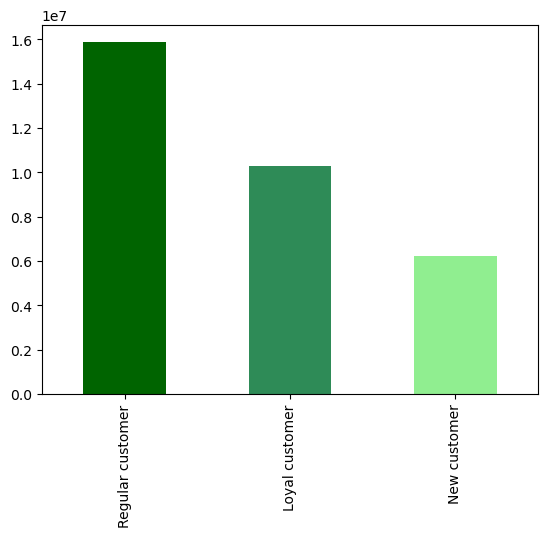

In [10]:
#create bar chart
loyalty_bar = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['darkgreen', 'seagreen', 'lightgreen'])

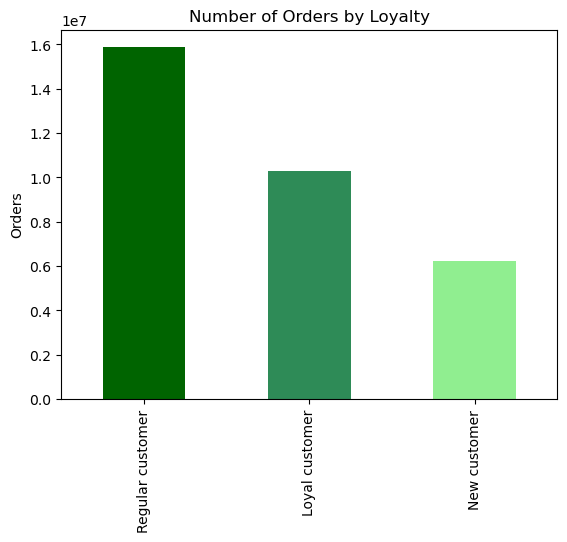

In [13]:
loyalty_bar.set_ylabel('Orders')
loyalty_bar.set_title('Number of Orders by Loyalty')
loyalty_bar.figure

### new customers place the lowest number of orders, loyal customers the second lowest, and regular customers the greatest number of orders

In [14]:
#export chart
loyalty_bar.figure.savefig(os.path.join(path, 
                                        '04.Analysis', 
                                        'Visualizations', 
                                        'bar_loyalty.png'))

## Create line chart for how prices change by hour of day

In [4]:
#create random sample seed
np.random.seed(7)

In [5]:
#create list for results from tests <= 0.7
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [6]:
#create dataframe sample_big to store 70% of random sample
sample_big = df_ords_prods_all[dev]

In [7]:
#create dataframe sample_small to store 30% of random sample
sample_small = df_ords_prods_all[~dev]

In [8]:
#check to make sure sum of two samples is equal to length of original df
len(sample_big) + len(sample_small) == len(df_ords_prods_all)

True

In [9]:
#create subset with prices and hour of the day
df_sub = sample_small[['prices', 'order_hour_of_day']]

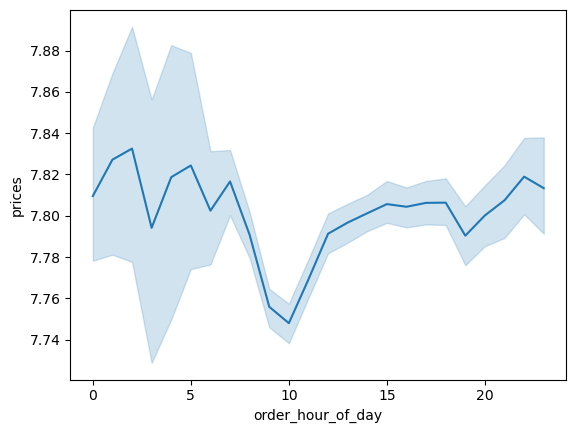

In [10]:
#use subset to create line chart
price_by_hr_linechart = sns.lineplot(data = df_sub, 
                                     x = 'order_hour_of_day', 
                                     y = 'prices')

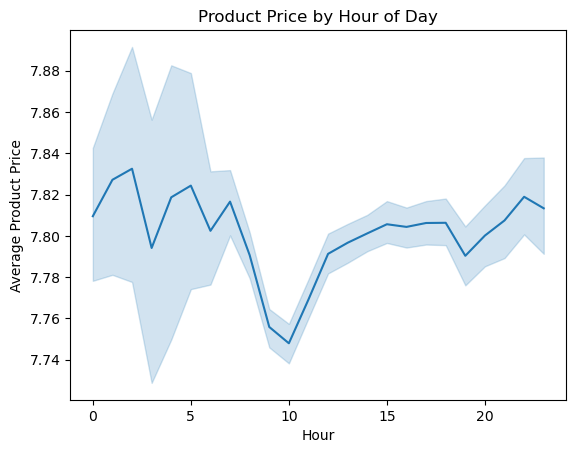

In [11]:
#add axis labels and title
price_by_hr_linechart.set_xlabel('Hour')
price_by_hr_linechart.set_ylabel('Average Product Price')
price_by_hr_linechart.set_title('Product Price by Hour of Day')
price_by_hr_linechart.figure

### prices are lowest at 10AM, increase after this, however the difference between the highest and lowest values is about 7 cents which appears fairly small

## Conduct exploratory analysis of customer demographics

### create line chart to see how age impacts number of dependants

In [ ]:
numdep_by_age_linechart = sns.lineplot(data = df_ords_prods_all, 
                                       x = 'Age', 
                                       y = 'num_dependants')

### there doesn't appear to be an obvious trend to number of dependants by age

In [ ]:
#create scatter with age and income (spending power)
age_inc_scatter = sns.scatterplot(data = df_ords_prods_all, 
                                  x = 'Age', 
                                  y = 'income')

### no obvious trend between age and income although after 40 income could be higher than 400,000 and the density of income above between 200,000 and 300,000 is higher

## Export remaining visualizations

In [12]:
price_by_hr_linechart.figure.savefig(os.path.join(path, 
                                                  '04.Analysis', 
                                                  'Visualizations', 
                                                  'price_by_hr_linechart.png'))

In [ ]:
numdep_by_age_linechart.figure.savefig(os.path.join(path, 
                                                    '04.Analysis', 
                                                    'Visualizations', 
                                                    'numdep_by_age_linechart.png'))

In [ ]:
age_inc_scatter.figure.savefig(os.path.join(path, 
                                            '04.Analysis', 
                                            'Visualizations', 
                                            'inc_by_age_scatter.png'))